# DX트랙 5차 미니프로젝트 
## 중증질환 예측 데이터 분석

[미션] 
 * 증상 데이터 (Features) 와 중증 질환(Target)의 특징 파악 (단변량 분석)
 * 증상 데이터 (Features) 와 중증 질환(Target) 간의 관계 분석 (이변량 분석)
 * AI 모델링을 위한 데이터 전처리 

In [2]:
# 라이브러리 불러오기 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 응급 출동 데이터 불러오기
# 파일명 119_emergency_dispatch.csv

data =pd.read_csv('119_emergency_dispatch.csv', encoding='cp949')
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,69.0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,뇌출혈,69.0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,뇌출혈,59.0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,67.0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,뇌경색,17.0


## 1) 데이터셋(data)의 기초 정보 확인하기

In [4]:
# data 데이터프레임의 행, 열 개수 확인
data.shape

(17209, 23)

In [5]:
# data 데이터프레임의 컬럼명, 데이터 개수, 타입 정보 확인1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17209 entries, 0 to 17208
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        17208 non-null  object 
 1   출동일시      17208 non-null  object 
 2   이름        17208 non-null  object 
 3   성별        17208 non-null  object 
 4   나이        17208 non-null  float64
 5   체온        17208 non-null  float64
 6   수축기 혈압    17208 non-null  float64
 7   이완기 혈압    17208 non-null  float64
 8   호흡 곤란     17208 non-null  float64
 9   간헐성 경련    17208 non-null  float64
 10  설사        17208 non-null  float64
 11  기침        17208 non-null  float64
 12  출혈        17208 non-null  float64
 13  통증        17208 non-null  float64
 14  만지면 아프다   17208 non-null  float64
 15  무감각       17208 non-null  float64
 16  마비        17208 non-null  float64
 17  현기증       17208 non-null  float64
 18  졸도        17208 non-null  float64
 19  말이 어눌해졌다  17208 non-null  float64
 20  시력이 흐려짐   17208 non-null  fl

In [6]:
# data 데이터프레임의 하위 3개 행 확인
data.tail(3)

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
17206,P27127,2023-01-30,선우**,여성,69.0,37.8,124.0,69.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,중증아님,37.0
17207,P27152,2023-01-31,가**,남성,39.0,38.2,78.0,31.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,중증아님,31.0
17208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 질문) data 데이터프레임에 결측치가 있는가?
data[data.isnull().any(axis=1)]

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
17208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

ID          0
출동일시        0
이름          0
성별          0
나이          0
체온          0
수축기 혈압      0
이완기 혈압      0
호흡 곤란       0
간헐성 경련      0
설사          0
기침          0
출혈          0
통증          0
만지면 아프다     0
무감각         0
마비          0
현기증         0
졸도          0
말이 어눌해졌다    0
시력이 흐려짐     0
중증질환        0
이송 시간       0
dtype: int64

## 2) 데이터 전처리

* 기존 컬럼을 이용하여 새로운 컬럼을 생성
* 추가해야 할 컬럼 내용
  * 연령구분 : 나이 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상으로 구분]
  * 출동월 : 출동일시 컬럼을 활용하여 출동월을 추출
  * 발열 : 체온 컬럼을 활용하여, 37도 이상인 경우 1, 이하인 경우 0으로 구분
  * 고혈압 : 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분
  * 저혈압 : 수축기 혈압 컬럼을 활용하여 90이하인 경우 1, 그렇지 않으면 0으로 구분
  

In [10]:
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,69.0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,뇌출혈,69.0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,뇌출혈,59.0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,67.0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,뇌경색,17.0


In [11]:
# 1) 연령구분 정보 구하기

data['연령구분'] = pd.cut(data['나이'],bins=[-np.inf,-1,9,19,29,39,49,59,69,79,89,np.inf], labels=['신생아','10대미만','10대','20대','30대','40대','50대','60대','70대','80대','90이상'])
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,69.0,90이상
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,뇌출혈,69.0,90이상
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,뇌출혈,59.0,20대
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,67.0,90이상
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,뇌경색,17.0,70대


In [12]:
# 2) 출동월 정보 구하기
# 출동일자 컬럼에서 출동월 정보를 추출하기
import datetime as dt

data['출동월'] = pd.to_datetime(data['출동일시']).dt.month
data.head()


,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,69.0,90이상,2
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,뇌출혈,69.0,90이상,2
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,뇌출혈,59.0,20대,2
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,뇌경색,67.0,90이상,2
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,뇌경색,17.0,70대,2


In [13]:
# 3) 발열 정보 구하기
# 37도 이상이면 1, 그렇지 않으면 0

data['발열'] = [1 if i >=37 else 0 for i in data['체온']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,뇌경색,69.0,90이상,2,0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,뇌출혈,69.0,90이상,2,0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,뇌출혈,59.0,20대,2,0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,뇌경색,67.0,90이상,2,0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,뇌경색,17.0,70대,2,0


In [14]:
# 4) 고혈압 정보 구하기
# 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분

data['고혈압'] = [1 if i >=140 else 0 for i in data['수축기 혈압']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열,고혈압
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,0.0,0.0,뇌경색,69.0,90이상,2,0,0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,0.0,1.0,0.0,뇌출혈,69.0,90이상,2,0,0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,0.0,1.0,1.0,뇌출혈,59.0,20대,2,0,0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,0.0,0.0,뇌경색,67.0,90이상,2,0,0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,0.0,1.0,0.0,1.0,뇌경색,17.0,70대,2,0,0


In [15]:
# 5) 저혈압 정보 구하기
# 수축기 혈압이 90이하인 경우 1, 그렇지 않으면 0

data['저혈압'] = [1 if i<=90 else 0 for i in data['수축기 혈압']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열,고혈압,저혈압
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,0.0,뇌경색,69.0,90이상,2,0,0,0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,1.0,0.0,뇌출혈,69.0,90이상,2,0,0,0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,1.0,1.0,뇌출혈,59.0,20대,2,0,0,0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,0.0,뇌경색,67.0,90이상,2,0,0,0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,1.0,0.0,1.0,뇌경색,17.0,70대,2,0,0,0


## 3) 단변량 분석 - 범주형 데이터

* 대상 : 중증질환/성별/연령구분/출동월별
* 데이터 가공이 필요한 정보
  * 연령구분 : 나이 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상으로 구분]
  * 출동월 : 출동일시 컬럼을 활용하여 출동월을 추출

In [16]:
# 중증질환 통계
# '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트
data['중증질환'].value_counts()


복부손상    4608
뇌경색     4224
뇌출혈     4096
심근경색    4096
중증아님     150
조산산모      12
신생아        9
사지접합       7
중증화상       6
Name: 중증질환, dtype: int64

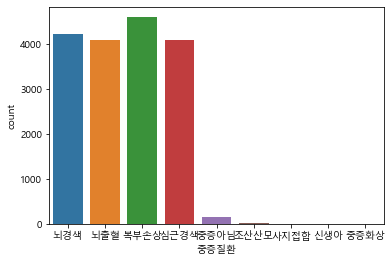

In [17]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '중증질환' 컬럼의 범주별 개수 시각화 
import seaborn as sns

sns.countplot(x=data['중증질환'])
plt.show()

* 중증 질환 중 [심근경색, 복부손상, 뇌경색, 뇌출혈]에 대한 자료만 추출하여 분석

In [18]:
# data 데이터프레임에서 '중증질환'값이 ['심근경색', '복부손상', '뇌경색', '뇌출혈'] 에 포함되는 경우만을 추출하여 desease 변수에 저장
# 이후 desease 데이터 프레임을 활용하여 분석

desease = data.loc[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]
desease

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열,고혈압,저혈압
0,P10312,2023-02-01,배**,남성,96.0,36.6,95.0,68.0,0.0,0.0,...,0.0,0.0,0.0,뇌경색,69.0,90이상,2,0,0,0
1,P10895,2023-02-01,라**,남성,98.0,36.5,113.0,82.0,0.0,1.0,...,0.0,1.0,0.0,뇌출혈,69.0,90이상,2,0,0,0
2,P11019,2023-02-01,당**,여성,26.0,36.2,102.0,69.0,1.0,0.0,...,0.0,1.0,1.0,뇌출혈,59.0,20대,2,0,0,0
3,P11152,2023-02-01,함**,남성,99.0,36.6,97.0,75.0,0.0,0.0,...,0.0,0.0,0.0,뇌경색,67.0,90이상,2,0,0,0
4,P11613,2023-02-01,태**,여성,79.0,36.5,133.0,71.0,0.0,0.0,...,1.0,0.0,1.0,뇌경색,17.0,70대,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17199,P24542,2023-01-21,황**,남성,53.0,38.5,129.0,75.0,0.0,0.0,...,0.0,0.0,0.0,복부손상,27.0,50대,1,1,0,0
17200,P24972,2023-01-21,염**,여성,48.0,36.3,96.0,71.0,0.0,0.0,...,0.0,0.0,0.0,복부손상,56.0,40대,1,0,0,0
17201,P26135,2023-01-21,빈**,여성,48.0,36.5,130.0,71.0,0.0,0.0,...,0.0,0.0,0.0,복부손상,13.0,40대,1,0,0,0
17202,P26321,2023-01-21,설**,여성,68.0,36.2,121.0,74.0,0.0,0.0,...,0.0,0.0,0.0,심근경색,60.0,60대,1,0,0,0


In [19]:
# desease의 '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['중증질환'].value_counts()


복부손상    4608
뇌경색     4224
뇌출혈     4096
심근경색    4096
Name: 중증질환, dtype: int64

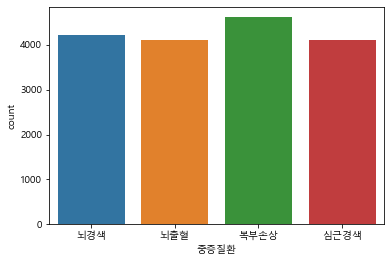

In [20]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '중증질환' 컬럼의 범주별 개수 시각화 
sns.countplot(x=desease['중증질환'])

plt.show()

#### 질문) 어느 중증질환에 출동 건수가 많았나요?

- Answer: 복부손상의 출동이 가장 많음

#### 질문) 중증질환별 출동 건수에 차이가 있나요?

- Answer: 차이가 어느정도 있다.

In [21]:
## '성별' 컬럼의 고유한 값(범주) 확인
desease['성별'].unique()

array(['남성', '여성'], dtype=object)

In [22]:
# '성별' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['성별'].value_counts()

남성    8523
여성    8501
Name: 성별, dtype: int64

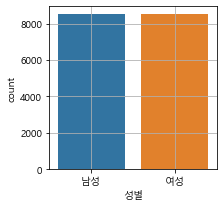

In [23]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '성별' 컬럼의 범주별 개수 시각화 
plt.figure(figsize=(3,3))
sns.countplot(x=desease['성별'])
plt.grid()
plt.show()

#### 질문) 어느 성별에 출동이 많았나요?

- 남성

##### 질문) 성별에 따른 출동 건수의 차이가 있나요?

- 거의 없다.

In [24]:
# '연령구분' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['연령구분'].value_counts()

40대      3159
50대      3150
30대      3141
60대      2460
20대      2143
70대      1243
80대       978
90이상      750
신생아         0
10대미만       0
10대         0
Name: 연령구분, dtype: int64

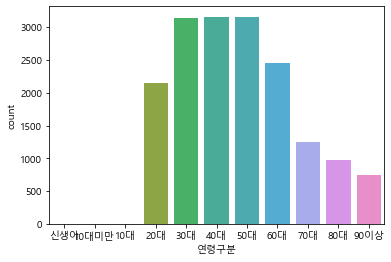

In [25]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '연령구분' 컬럼의 범주별 개수 시각화 
sns.countplot(x=desease['연령구분'])
plt.show()

##### 질문) 어느 연령대가 가장 많은가요?
- 40대가 가장 많다.

##### 질문) 연령대별로 출동 건수의 차이가 있나요?
- 30대, 40대 50대는 출동건수가 거의 비슷하나 60대 이후로는 급격하게 감소하는 추세다.



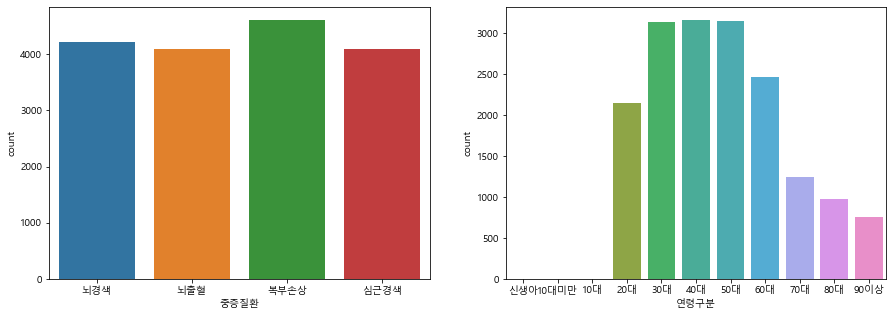

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=desease['중증질환'])
plt.subplot(1,2,2)
sns.countplot(x=desease['연령구분'])
plt.show()

In [27]:
# '출동월' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['출동월'].value_counts()

3    7289
1    5295
2    4050
4     390
Name: 출동월, dtype: int64

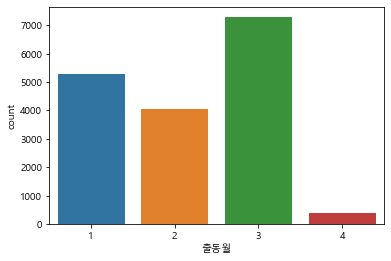

In [28]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '출동월' 컬럼의 범주별 개수 시각화 
sns.countplot(x=desease['출동월'])

plt.show()

##### 질문) 어느 월에 출동 건수가 많았나요?
- 3월
##### 질문) 월별 출동 건수에 차이가 있나요?
- 3월이 가장 많고 4월이 가장 적다. 차이가 분명히 존재함



## 4) 단변량 분석 - 숫자형 데이터
* 대상 : 체온, 수축기 혈압

In [29]:
# 체온 컬럼에 대한 기초 통계 정보 확인하기
desease['체온'].describe()

count    17024.000000
mean        36.599430
std          0.635988
min         36.000000
25%         36.200000
50%         36.500000
75%         36.800000
max         39.900000
Name: 체온, dtype: float64

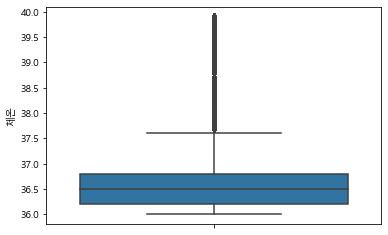

In [30]:
# seaborn의 boxplot을 이용하여 '체온' 컬럼의 분포를 시각화

sns.boxplot(y=desease['체온'])
plt.show()

#### 질문) 체온 컬럼의 데이터 분포는 어떠한가?
- 평균 값은 36.5도이나 이상치들이 꽤 발견됨

#### 질문) 체온 컬럼의 데이터에 이상치가 존재하는가? 
- 존재

#### 질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가?
- 유지해야한다.


In [31]:
# 수축기 혈압 컬럼에 대한 기초 통계 정보 확인하기
desease['수축기 혈압'].describe()


count    17024.000000
mean       113.810914
std         13.742302
min         70.000000
25%        104.000000
50%        114.000000
75%        124.000000
max        159.000000
Name: 수축기 혈압, dtype: float64

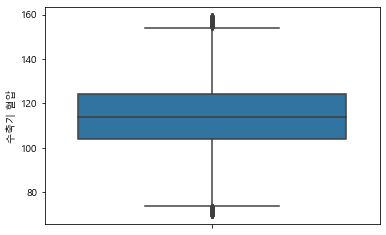

In [32]:
# seaborn의 boxplot을 이용하여 '수축기 혈압' 컬럼의 분포를 시각화
sns.boxplot(y=desease['수축기 혈압'])
plt.show()

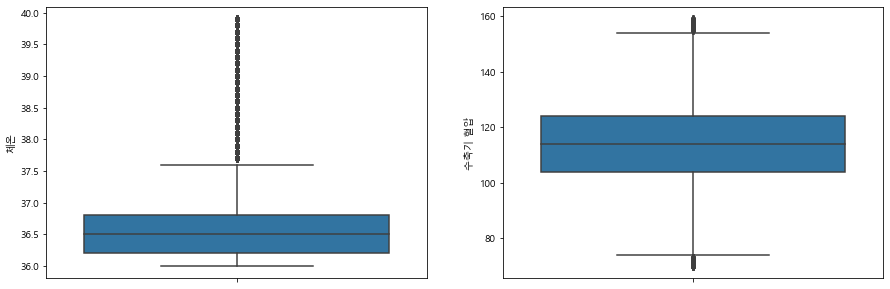

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=desease['체온'])
plt.subplot(1,2,2)
sns.boxplot(y=desease['수축기 혈압'])
plt.show()

#### 질문) 수축기 혈압 컬럼의 데이터 분포는 어떠한가?
- 평균이 113이고 어느정도 평균을 기준을 분포하나 일부 이상치가 존재

#### 질문) 수축기 혈압 컬럼의 데이터에 이상치가 존재하는가? 
- 존재함 저혈압/ 고혈압

#### 질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가?
- 유지


## 5) 이변량 분석 - 범주 vs 범주

 * Target : 중증 질환
 * Feature : 성별, 연령구분, 출동월, 증상 리스트

In [34]:
# 1) Feature : 성별, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 성별로 중증 질환에 차이가 없다
# 대립 가설 : 성별로 중증 질환에 차이가 있다.

In [35]:
# pandas의 crosstab을 이용하여 집계

cross_sex = pd.crosstab(desease['성별'],desease['중증질환'])

# 수치화 검증 : 카이제곱 검증 (상관계수와 p-value 확인)

chi2_sex = spst.chi2_contingency(cross_sex)
chi2_sex

(0.8894904630022681,
 0.8279632333263119,
 3,
 array([[2114.72932331, 2050.64661654, 2306.97744361, 2050.64661654],
        [2109.27067669, 2045.35338346, 2301.02255639, 2045.35338346]]))

- 카이제곱 검정통계량은 0.889이므로 기대빈도와 실제 값의 차이가 별로 없음
- p-value값은 0.82이므로 0.05보다 크므로 귀무 가설 채택
- 즉 성별에 따라 중증 질환에 차이가 없다.

In [36]:
# 2) Feature : 연령 구분, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 연령 구분대별로 중증 질환에 차이가 없다
# 대립 가설 : 연령 구분대별로 중증 질환에 차이가 있다.

In [37]:
# pandas의 crosstab을 이용하여 집계

cross_age = pd.crosstab(desease['연령구분'],desease['중증질환'])

# 수치화 검증 : 카이제곱 검증 (상관계수와 p-value 확인)

chi2_age = spst.chi2_contingency(cross_age)
chi2_age

(16.035011258815707,
 0.7676807326530457,
 21,
 array([[531.72180451, 515.60902256, 580.06015038, 515.60902256],
        [779.34586466, 755.72932331, 850.19548872, 755.72932331],
        [783.81203008, 760.06015038, 855.06766917, 760.06015038],
        [781.57894737, 757.89473684, 852.63157895, 757.89473684],
        [610.37593985, 591.87969925, 665.86466165, 591.87969925],
        [308.41353383, 299.06766917, 336.45112782, 299.06766917],
        [242.66165414, 235.30827068, 264.72180451, 235.30827068],
        [186.09022556, 180.45112782, 203.0075188 , 180.45112782]]))

- 카이제곱 검정통계량은 16.03이므로 기대빈도와 실제 값의 차이가 별로 없음
- p-value값은 0.76이므로 0.05보다 크므로 귀무 가설 채택
- 즉 연령구분대 별로 중증 질환에 차이가 없다.

In [38]:
# 3) Feature : 출동월, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 출동월별로 중증 질환에 차이가 없다
# 대립 가설 : 출동월별로 중증 질환에 차이가 있다.

In [39]:
# pandas의 crosstab을 이용하여 집계

cross_month = pd.crosstab(desease['출동월'],desease['중증질환'])

# 수치화 검증 : 카이제곱 검증 (상관계수와 p-value 확인)

chi2_month = spst.chi2_contingency(cross_month)
chi2_month

(7.458023154020693,
 0.5895452418994855,
 9,
 array([[1313.79699248, 1273.98496241, 1433.23308271, 1273.98496241],
        [1004.88721805,  974.43609023, 1096.2406015 ,  974.43609023],
        [1808.54887218, 1753.7443609 , 1972.96240602, 1753.7443609 ],
        [  96.76691729,   93.83458647,  105.56390977,   93.83458647]]))

- 카이제곱 검정통계량은 7.45이므로 기대빈도와 실제 값의 차이가 별로 없음
- p-value값은 0.58이므로 0.05보다 크므로 귀무 가설 채택
- 즉 출동월 별로 중증 질환에 차이가 없다.

In [40]:
# 4) Feature : 증상리스트, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 각 증상별로 중증 질환에 차이가 없다
# 대립 가설 : 각 증상별로 중증 질환에 차이가 있다.

In [41]:
# 증상 리스트 

symptom = ['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']

In [42]:
# for문을 이용하여 각 증상과 중증질환과의 카이제곱 검증 시행

for one_sym in symptom:
    cross_sym = pd.crosstab(desease[one_sym],desease['중증질환'])

    # 수치화 검증 : 카이제곱 검증 (상관계수와 p-value 확인)
    chi2_sym = spst.chi2_contingency(cross_sym)
    
    if chi2_sym[1] >= 0.05:
        print(f'대립가설 기각: {one_sym} 에 따라 중증 질환에 차이가 없다.', 'p-value:',chi2_sym[1])
    else:
        print(f'대립가설 채택: {one_sym} 에 따라 중증 질환에 차이가 있다.','p-value:',chi2_sym[1])
        
    

대립가설 채택: 호흡 곤란 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 간헐성 경련 에 따라 중증 질환에 차이가 있다. p-value: 5.12065792298629e-258
대립가설 채택: 설사 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 기침 에 따라 중증 질환에 차이가 있다. p-value: 3.910021500047704e-232
대립가설 채택: 출혈 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 통증 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 만지면 아프다 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 무감각 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 마비 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 현기증 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 졸도 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 말이 어눌해졌다 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 시력이 흐려짐 에 따라 중증 질환에 차이가 있다. p-value: 0.0
대립가설 채택: 발열 에 따라 중증 질환에 차이가 있다. p-value: 9.27677711203191e-200
대립가설 채택: 고혈압 에 따라 중증 질환에 차이가 있다. p-value: 0.005242633665231849
대립가설 채택: 저혈압 에 따라 중증 질환에 차이가 있다. p-value: 2.7585538310404642e-39


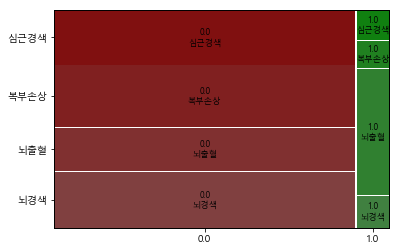

In [43]:
# mosaic를 이용하여 간헐성 경련 vs 중증질환 관계를 시각화

from statsmodels.graphics.mosaicplot import mosaic

mosaic(desease,['간헐성 경련','중증질환'])
plt.show()

## 6) 이변량 분석 - 숫자형 vc 범주형

 * Target : 중증 질환
 * Feature : 나이, 체온, 수축기 혈압, 이완기 혈압

In [44]:
# 가설 수립
# 귀무 가설 : feature에 따라 중증 질환에 차이가 없다
# 대립 가설 : feature에 따라 중증 질환에 차이가 있다.

In [45]:
desease['중증질환'].unique()

array(['뇌경색', '뇌출혈', '복부손상', '심근경색'], dtype=object)

In [46]:
# anova 분석 대상 리스트 확인

anova_column = ['나이', '체온', '수축기 혈압', '이완기 혈압']

#for 문을 이용하여 각 속성별로 데이터프레임을 분리하고, anova 분석 결과를 확인

for one_column in anova_column:
    Class_1= desease.loc[desease['중증질환'] == "뇌출혈", one_column]
    Class_2= desease.loc[desease['중증질환'] == '뇌경색', one_column]
    Class_3= desease.loc[desease['중증질환'] == '복부손상', one_column]
    Class_4= desease.loc[desease['중증질환'] == '심근경색', one_column]
    result=spst.f_oneway(Class_1,Class_2,Class_3,Class_4)
    print(result)
    print(result[1])

F_onewayResult(statistic=2.3529735359873114, pvalue=0.07008234380708696)
0.07008234380708696
F_onewayResult(statistic=201.84396148529783, pvalue=1.2066485057601664e-128)
1.2066485057601664e-128
F_onewayResult(statistic=7.437059869693044, pvalue=5.657109130351948e-05)
5.657109130351948e-05
F_onewayResult(statistic=12.87837177481653, pvalue=2.117334620631215e-08)
2.117334620631215e-08


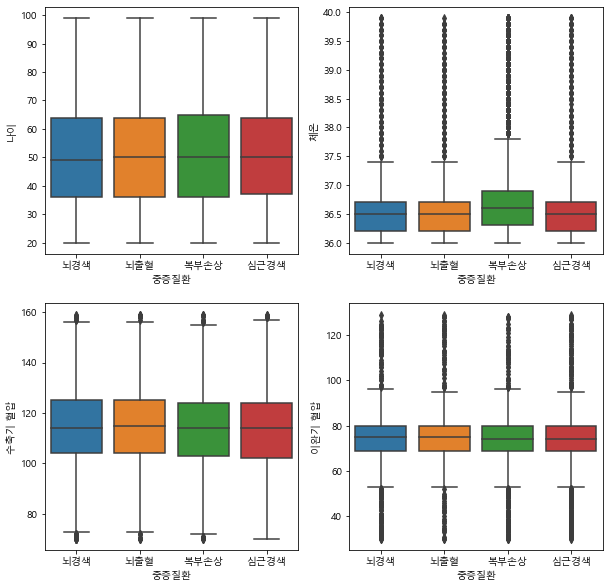

In [47]:
# seaborn의 boxplot을 활용하여 증상별 feature값 분포의 차이를 시각화
plt.figure(figsize=(10,10))
for i,one_column in enumerate(anova_column):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=desease['중증질환'],y=desease[one_column])
plt.show()


#### 질문) 숫자형 vc 범주형 이변량 분석 결과를 정리하세요


    - 뇌출혈과 중증질환의 관계는 F통계량이 2.35이고 pvalue값이 0.07이므로 귀무가설 채택
    - 뇌경색과 중증질환의 관계는 F통계량이 201이고 pvalue값이 0.05보다 작으므로 대립가설 채택
    - 복부손상과 중증질환의 관계는 F통게량이 7.4이고 pvalue값이 0.05보다 작으므로 대립가설 채택
    - 심근경색과 중증질환의 관계는 F통계량이 12.8이고 pvalue값이 0.05보다 작으므로 대립가설 채택

## 7) 데이터 분석 결과

#### 데이터 분석 결과, AI 모델링에 반영할 Feature
- '체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다'
- '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압'

